In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.display.max_columns = 0

In [3]:
calendar = pd.read_csv("datasets/calendar.csv")
listings = pd.read_csv("datasets/listings.csv")

In [7]:
calendar.head()

,listing_id,date,available,price,metro_area
0,2515,2018-03-05,t,69.0,NYC
1,2515,2018-03-04,t,69.0,NYC
2,2515,2018-03-03,t,69.0,NYC
3,2515,2018-03-02,t,69.0,NYC
4,2515,2018-03-01,t,69.0,NYC


In [8]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


## Prices Distribution for property type

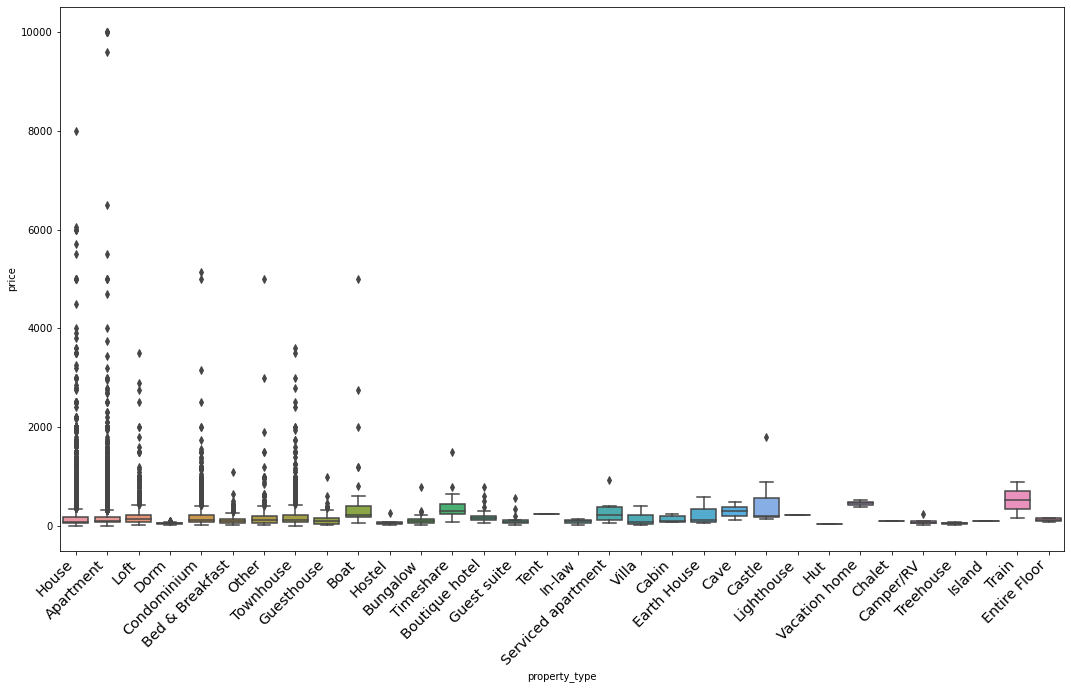

In [48]:

plt.figure(figsize=(18,10))
sns.boxplot(x="property_type", y="price", #hue="zipcode",
                 data=listings)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## Count property types 

In [54]:
listings.groupby("property_type")["price"].count().sort_values(ascending = False)
#we need to use only some property types

property_type
Apartment             46149
House                  8466
Condominium            1723
Townhouse              1282
Loft                   1109
Bed & Breakfast         339
Other                   300
Guesthouse               77
Dorm                     72
Timeshare                43
Boutique hotel           42
Boat                     38
Bungalow                 33
Villa                    30
Hostel                   27
Guest suite              25
In-law                   15
Serviced apartment       10
Camper/RV                 8
Castle                    7
Cabin                     5
Entire Floor              4
Earth House               3
Treehouse                 2
Cave                      2
Train                     2
Vacation home             2
Chalet                    1
Tent                      1
Island                    1
Lighthouse                1
Hut                       1
Name: price, dtype: int64

In [59]:
listings[listings['property_type'] == 'Entire Floor']
listings[listings['property_type'] == 'Cabin']
listings[listings['property_type'] == 'Serviced apartment']


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
11510,2.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",26,1.0,Real Bed,1.0,1.0,flexible,queens,NaN,108016086,16463193,f,40.769430,-73.760825,NYC,Spacious luxury studio suite with water view,245.0,Serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11361
17106,2.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",8,1.0,Real Bed,1.0,1.0,moderate,brooklyn,NaN,15058648,16961053,f,40.688873,-73.980146,NYC,Spacious private room in an apt w/ stunning views,100.0,Serviced apartment,10.0,9.0,10.0,10.0,96.0,10.0,Private room,NY,NaN,11217.0
22095,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",15,1.0,Real Bed,1.0,1.0,strict,new york,NaN,89607654,16089715,f,40.768852,-73.990821,NYC,Hells Kitchen Luxury High Rise w/ Unmatched Views,71.0,Serviced apartment,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10019.0
24675,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,4.0,Real Bed,4.0,5.0,strict,new york,NaN,107778975,16436944,t,40.747627,-73.979577,NYC,"(Fully-Serviced) 4Bd, 3 Floor Midtown Townhome",925.0,Serviced apartment,10.0,8.0,10.0,10.0,100.0,10.0,Entire home/apt,NY,NaN,10016
27596,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",27,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,102552251,15835858,t,40.807857,-73.958999,NYC,Cozy & quiet one bedroom with a great neighbor...,300.0,Serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10027
29990,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,2.0,3.0,moderate,new york,NaN,24846887,16122505,f,40.724534,-74.003588,NYC,Two-Story SOHO Penthouse w/ Private Outdoor Ga...,408.0,Serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10012
30592,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",9,1.0,Real Bed,0.0,1.0,flexible,staten island,NaN,114552571,17075535,t,40.643319,-74.082833,NYC,"Lovely, private studio apartment near Manhattan.",110.0,Serviced apartment,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,NY,NaN,10301
31578,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,1.0,2.0,flexible,new york,NaN,103129437,15899550,t,40.717384,-74.011899,NYC,Tribeca beauty!,400.0,Serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10013
46171,3.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",3,1.0,Real Bed,1.0,1.0,flexible,chicago,NaN,104278824,17844354,t,41.870450,-87.630773,chicago,Views of the city 1 bedroom. Very exotic,210.0,Serviced apartment,10.0,8.0,10.0,10.0,80.0,10.0,Entire home/apt,IL,NaN,60605
58957,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",26,1.0,Pull-out Sofa,0.0,1.0,flexible,washington,NaN,27477900,16400945,f,38.920273,-77.071416,dc,Studio Apt in Historic DC Glover Park Rowhouse,135.0,Serviced apartment,10.0,10.0,10.0,10.0,90.0,9.0,Entire home/apt,DC,NaN,20007


## Look into a few property types

In [69]:
listings_filt = (listings[listings['property_type'].isin(['Apartment',
'House',
'Condominium',
'Townhouse',
'Loft',
'Bed & Breakfast'])])

In [70]:
listings_filt.groupby("property_type")["price"].describe().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Bed & Breakfast,339.0,125.321534,100.509176,28.0,70.0,99.0,150.0,1100.0
Apartment,46149.0,148.611909,192.261521,0.0,75.0,110.0,175.0,10000.0
Loft,1109.0,206.237151,272.603053,14.0,80.0,135.0,220.0,3500.0
Condominium,1723.0,208.547301,284.798842,14.0,85.0,130.0,220.0,5150.0
Townhouse,1282.0,209.058502,305.368229,10.0,75.0,120.0,220.0,3600.0
House,8466.0,189.349870,370.762770,0.0,60.0,90.0,177.0,8000.0


### Distribution by state, only apartment

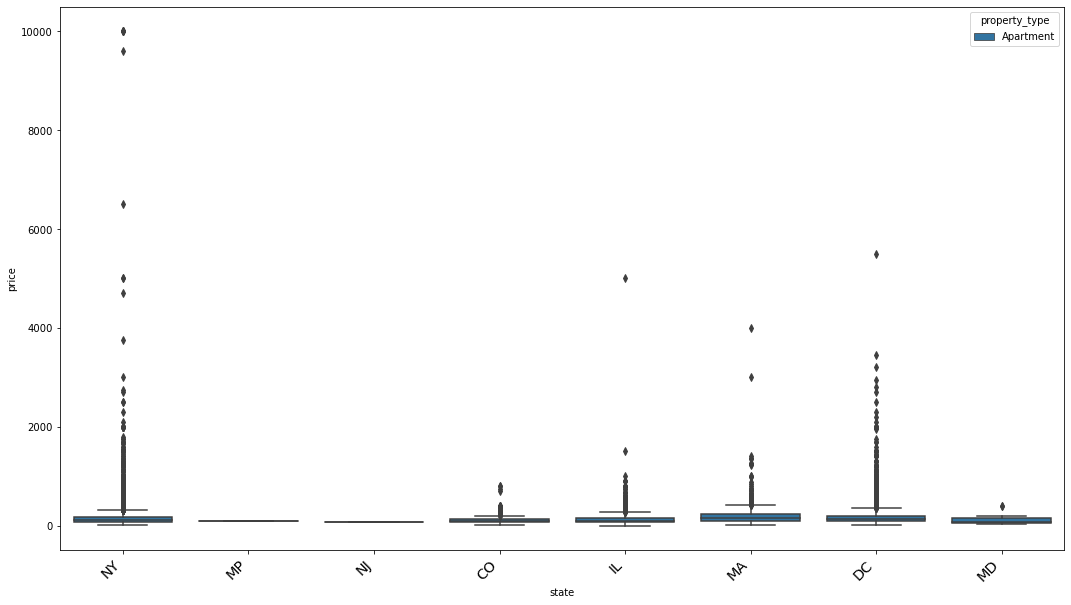

In [81]:

plt.figure(figsize=(18,10))
sns.boxplot(x="state", y="price", hue="property_type",
                 data=listings_filt[listings_filt['property_type'] == "Apartment"])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

### Registers per city

In [117]:
listings_filt['city'].value_counts()

new york        19360
brooklyn        16398
washington       7618
chicago          5064
boston           3344
                ...  
lawrence            1
oak lawn            1
elmwood park        1
harlem              1
statenisland        1
Name: city, Length: 131, dtype: int64

In [112]:
#Per city, number of rows (n_rows) and number of distincts zipcodes for that city (n_zipcode)
n_city_zipcode = (
    listings_filt
    .groupby('city', as_index = False 
            )
    .agg(
        n_zipcodes = ('zipcode','nunique'),
        n_rows = ('city', 'count')
    )
    .sort_values(by = 'n_rows', ascending = False)
    .reset_index()
    
)

n_city_zipcode.head(30)

,index,city,n_zipcodes,n_rows
0,85,new york,160,19360
1,17,brooklyn,58,16398
2,123,washington,30,7618
3,28,chicago,56,5064
4,12,boston,33,3344
5,95,queens,85,2628
6,33,denver,32,2447
7,118,sunnysidebronx,42,657
8,116,staten island,16,247
9,2,astoria,7,238


/home/gdot/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


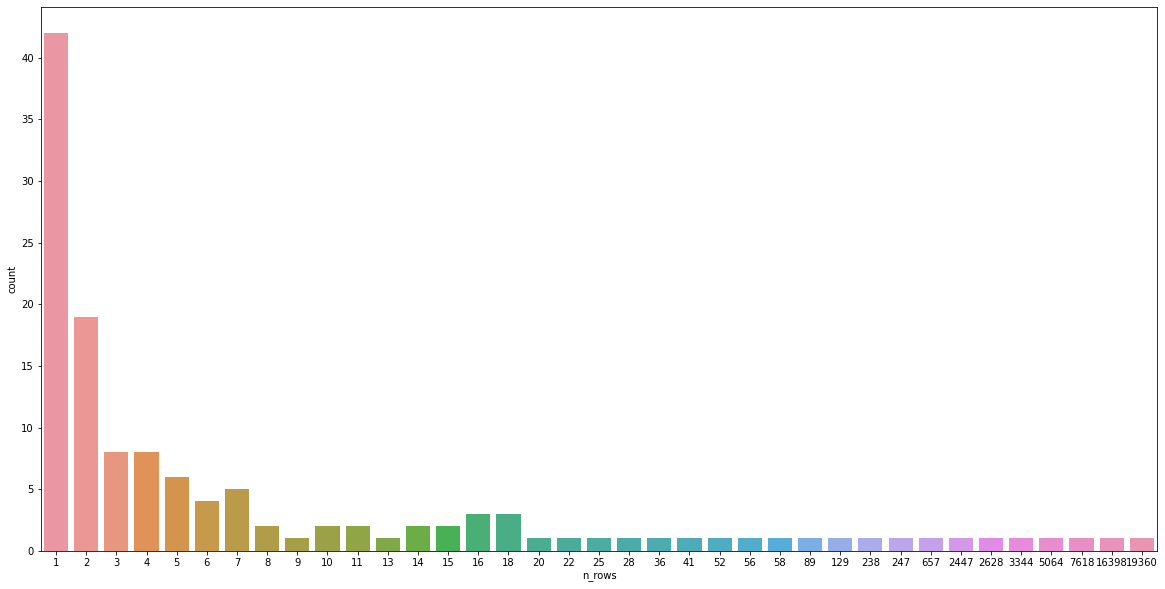

In [113]:

plt.figure(figsize=(20, 10))
sns.countplot('n_rows',data=n_city_zipcode)
plt.show()

/home/gdot/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


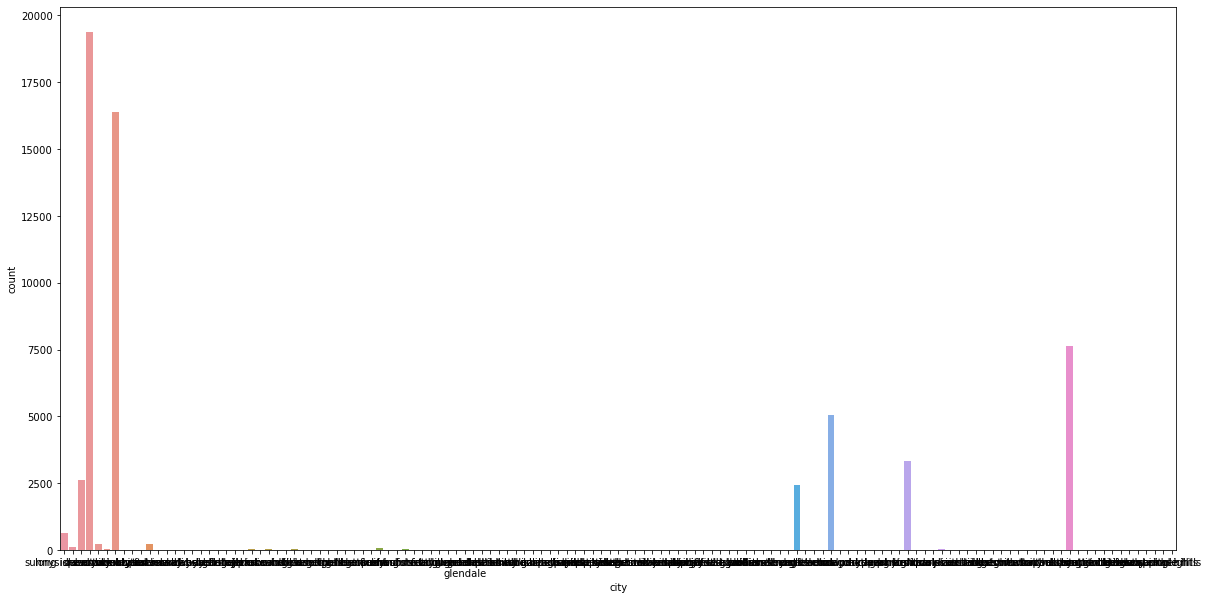

In [92]:

plt.figure(figsize=(20, 10))
sns.countplot('city',data=listings_filt)
plt.show()

In [76]:
listings_filt[listings_filt['property_type'] == "Apartment"]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
7,3.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",5,1.0,Real Bed,1.0,2.0,strict,sunnysidebronx,NaN,3684360,715270,f,40.859559,-73.870669,NYC,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,39.0,Apartment,9.0,9.0,9.0,9.0,90.0,9.0,Private room,NY,NaN,10467
9,8.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",12,1.0,Real Bed,1.0,3.0,strict,sunnysidebronx,NaN,873273,182177,t,40.864658,-73.857087,NYC,PRIVATE FLAT / APARTMENT- $SPECIAL$,125.0,Apartment,10.0,9.0,10.0,9.0,92.0,9.0,Entire home/apt,NY,NaN,10469
12,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,2.0,2.0,strict,sunnysidebronx,NaN,49293611,9513511,f,40.857532,-73.866055,NYC,"Beautiful, spacious & sunny 2 bedroom apartment!",130.0,Apartment,10.0,10.0,10.0,9.0,85.0,10.0,Entire home/apt,NY,NaN,10462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59809,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0,1.0,Real Bed,0.0,1.0,strict,washington,NaN,10292686,7930288,f,38.890430,-77.000648,dc,3rd & A Apt 1 Great Location 2 blocks to Capitol,95.0,Apartment,9.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,DC,1250.0,20002
59810,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,1.0,Real Bed,1.0,2.0,moderate,takoma park,NaN,128419174,18504338,t,38.972895,-77.007848,dc,"Lovely Modern 1 bed/1 bath Apt in Takoma Park, MD",85.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MD,NaN,20912
59815,1.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",27,1.0,Real Bed,0.0,1.0,flexible,mount rainier,NaN,126423287,18342528,t,38.944272,-76.968505,dc,Perfect living space 10 mins from downtown D.C.,50.0,Apartment,10.0,10.0,10.0,10.0,100.0,10.0,Private room,MD,NaN,20712
59819,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,silver spring,NaN,84708427,16232278,t,38.993370,-77.036706,dc,Friendly Warm & Clean Atmosphere,42.0,Apartment,9.0,8.0,9.0,8.0,80.0,9.0,Private room,MD,NaN,20910


In [71]:
#listings.groupby(["property_type", "zipcode"])["price"].describe().sort_values(by="std")
(listings_filt
 .groupby(["property_type", "zipcode"])["price"]
 .describe()
 .sort_values(by=["count", "std"], ascending = False))

count        mean         std  ...    50%    75%     max
property_type zipcode                                  ...                      
Apartment     11211    1835.0  136.232153  113.622020  ...  105.0  175.0  2500.0
              11206    1205.0   92.582573   81.895967  ...   75.0  103.0  1300.0
              10002    1196.0  177.155518  413.888386  ...  128.0  189.0  9999.0
              10009    1112.0  160.867806  110.374477  ...  130.0  195.0  1700.0
              11221    1094.0   83.946984   63.889392  ...   67.0   99.0  1115.0
...                       ...         ...         ...  ...    ...    ...     ...
Townhouse     80214.0     1.0   59.000000         NaN  ...   59.0   59.0    59.0
              80224.0     1.0   59.000000         NaN  ...   59.0   59.0    59.0
              80231.0     1.0   75.000000         NaN  ...   75.0   75.0    75.0
              80235.0     1.0   59.000000         NaN  ...   59.0   59.0    59.0
              80238.0     1.0  115.000000         NaN  ...  115.0  115.0   115.0

[1419 rows x 8 columns]

In [16]:
listings.groupby("property_type")["price"].count()

property_type
Apartment             46149
Bed & Breakfast         339
Boat                     38
Boutique hotel           42
Bungalow                 33
Cabin                     5
Camper/RV                 8
Castle                    7
Cave                      2
Chalet                    1
Condominium            1723
Dorm                     72
Earth House               3
Entire Floor              4
Guest suite              25
Guesthouse               77
Hostel                   27
House                  8466
Hut                       1
In-law                   15
Island                    1
Lighthouse                1
Loft                   1109
Other                   300
Serviced apartment       10
Tent                      1
Timeshare                43
Townhouse              1282
Train                     2
Treehouse                 2
Vacation home             2
Villa                    30
Name: price, dtype: int64